## Preprocessing and Illustration

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
train_df = pd.read_csv("mitbih_train.csv", header=None)
test_df = pd.read_csv("mitbih_test.csv", header=None)

In [3]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_df[187]=train_df[187].astype(int)
eq=train_df[187].value_counts()
print(eq)

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


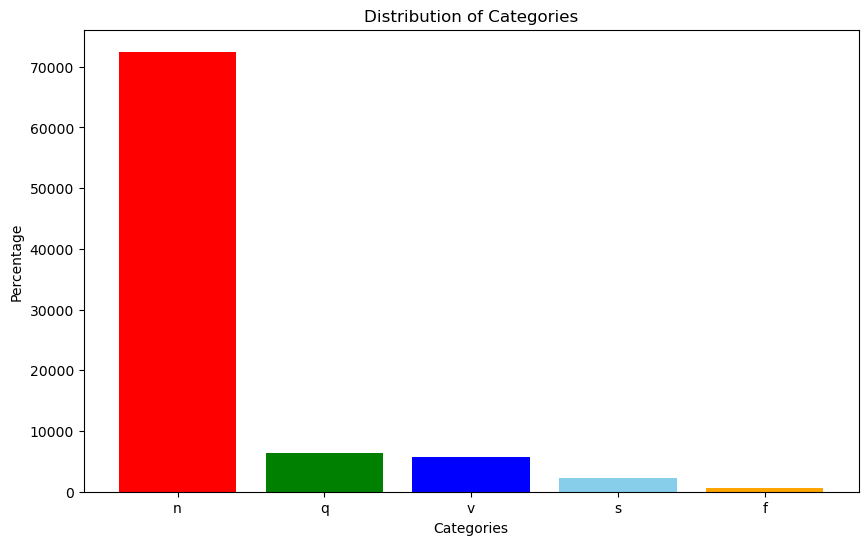

In [5]:
# Labels for each category
labels = ['n', 'q', 'v', 's', 'f']

# Colors for each category
colors = ['red', 'green', 'blue', 'skyblue', 'orange']

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, eq, color=colors)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Distribution of Categories')

plt.show()

as we can see our data is heavily imbalenced, we have 3 ways to go now:
1-Oversample:Replicate or generate new instances for the minority class to match the count of the majority class. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be useful.
2-Undersample:Randomly remove instances from the majority class to balance the class distribution. However, this may result in a loss of information.
3-Weighted Loss

In [6]:
#Oversampling the data, upsampling the classes 1-4
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [7]:
eq=train_df[187].value_counts()
print(eq)

187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


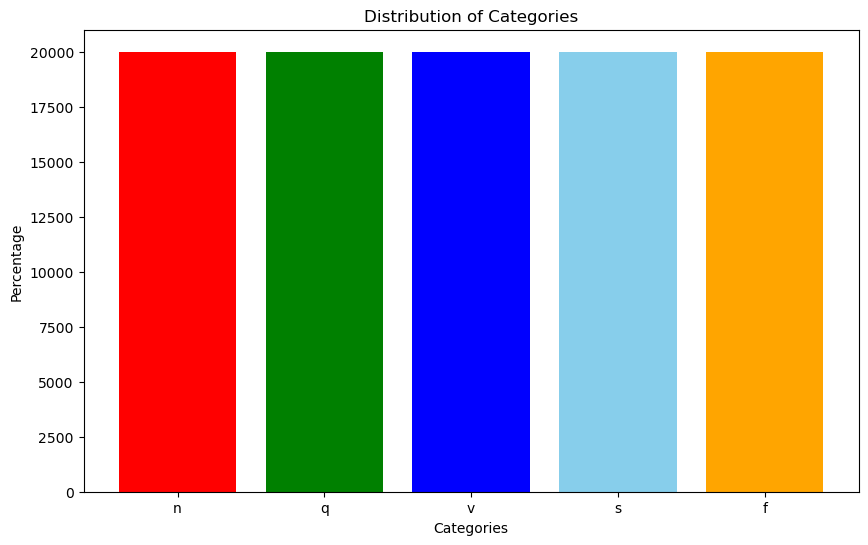

In [8]:
# Labels for each category
labels = ['n', 'q', 'v', 's', 'f']

# Colors for each category
colors = ['red', 'green', 'blue', 'skyblue', 'orange']

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, eq, color=colors)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Distribution of Categories')

plt.show()

now our data is balanced and we can continue

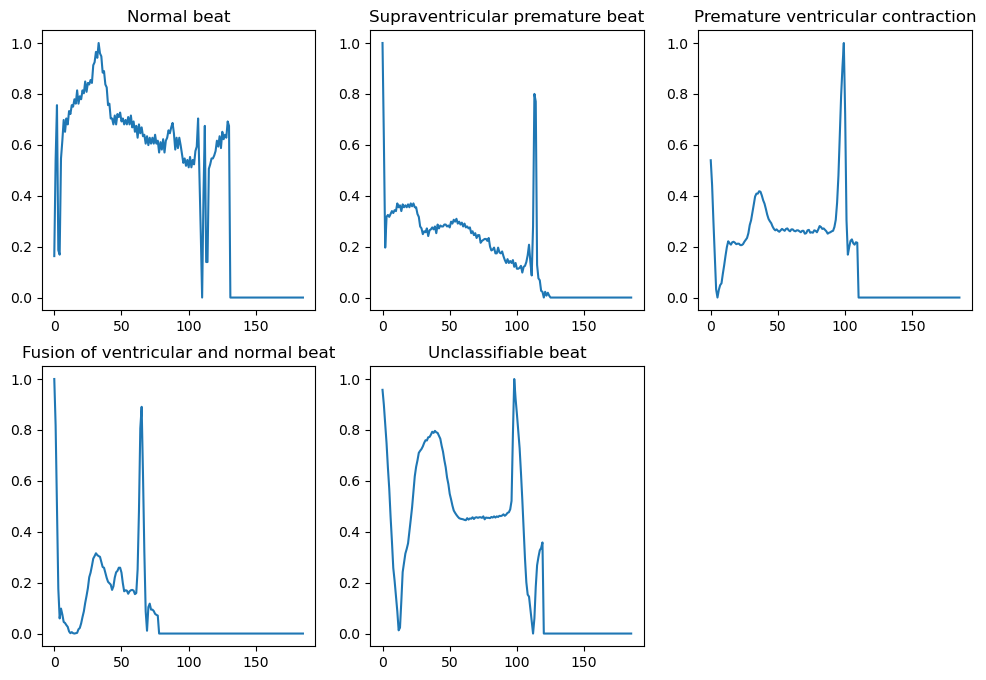

In [9]:
#ploting the heartbeats. Each heartbeat is 188 long.
# Extract rows for each heartbeat type
heartbeat_0 = train_df[train_df[187] == 0].iloc[0, :186]
heartbeat_1 = train_df[train_df[187] == 1].iloc[0, :186]
heartbeat_2 = train_df[train_df[187] == 2].iloc[0, :186]
heartbeat_3 = train_df[train_df[187] == 3].iloc[0, :186]
heartbeat_4 = train_df[train_df[187] == 4].iloc[0, :186]

# Plot each heartbeat type
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(heartbeat_0)
plt.title("Normal beat")

plt.subplot(2, 3, 2)
plt.plot(heartbeat_1)
plt.title("Supraventricular premature beat")

plt.subplot(2, 3, 3)
plt.plot(heartbeat_2)
plt.title("Premature ventricular contraction")

plt.subplot(2, 3, 4)
plt.plot(heartbeat_3)
plt.title("Fusion of ventricular and normal beat")

plt.subplot(2, 3, 5)
plt.plot(heartbeat_4)
plt.title("Unclassifiable beat")

plt.show()


In [78]:
from sklearn.model_selection import train_test_split
# Extract features (X) and labels (y)
X = train_df.iloc[:, :186]  # Features
y = train_df[187]  # Labels

# One-hot encode the categorical column
y_encoded = pd.get_dummies(y, prefix='heartbeat_type')

# Concatenate the one-hot encoded labels with the features
df_encoded = pd.concat([X, y_encoded], axis=1)

# Optionally, you can split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(df_encoded.iloc[:, :186], df_encoded.iloc[:, 186:], test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [79]:
# Extract features (X) and labels (y)
Xt = test_df.iloc[:, :186]  # Features
yt = test_df[187]  # Labels

# One-hot encode the categorical column
yt_encoded = pd.get_dummies(yt, prefix='heartbeat_type')

# Concatenate the one-hot encoded labels with the features
test_encoded = pd.concat([Xt, yt_encoded], axis=1)

X_test, y_test = test_encoded.iloc[:, :186], test_encoded.iloc[:, 186:]
X_test = scaler.transform(X_test)

In [80]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(80000, 186)
(20000, 186)
(80000, 5)
(20000, 5)


## CNN model

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Activation, Add, MaxPooling1D, Flatten, Dense, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping

In [13]:
#Making the articles Model
inp = Input(shape=(186, 1))
C = Conv1D(filters=32, kernel_size=5, strides=1)(inp)

C11 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = Activation("relu")(C11)
C12 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = Add()([C12, C])
A12 = Activation("relu")(S11)
M11 = MaxPooling1D(pool_size=5, strides=2)(A12)


C21 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = Activation("relu")(C21)
C22 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = Add()([C22, M11])
A22 = Activation("relu")(S11)
M21 = MaxPooling1D(pool_size=5, strides=2)(A22)


C31 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = Activation("relu")(C31)
C32 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = Add()([C32, M21])
A32 = Activation("relu")(S31)
M31 = MaxPooling1D(pool_size=5, strides=2)(A32)


C41 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = Activation("relu")(C41)
C42 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = Add()([C42, M31])
A42 = Activation("relu")(S41)
M41 = MaxPooling1D(pool_size=5, strides=2)(A42)


C51 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = Activation("relu")(C51)
C52 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = Add()([C52, M41])
A52 = Activation("relu")(S51)
M51 = MaxPooling1D(pool_size=5, strides=2)(A52)

F1 = Flatten()(M51)

D1 = Dense(32)(F1)
A6 = Activation("relu")(D1)
D2 = Dense(32)(A6)
D3 = Dense(5)(D2)
A7 = Softmax()(D3)

model = Model(inputs=inp, outputs=A7)

model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 186, 1)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 182, 32)              192       ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 182, 32)              5152      ['conv1d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 182, 32)              0         ['conv1d_1[0][0]']            
                                                                                            

In [14]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 186, 1)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 182, 32)              192       ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 182, 32)              5152      ['conv1d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 182, 32)              0         ['conv1d_1[0][0]']            
                                                                                              

In [15]:
# Learning rate scheduler
def lr_scheduler(epoch, lr):
    decay_factor = 0.75
    decay_period = 25 #changed this from 10000
    if epoch % decay_period == 0 and epoch != 0:
        return lr * decay_factor
    return lr

lr_callback = LearningRateScheduler(lr_scheduler, verbose=1)

In [16]:
# Model checkpoint
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

In [17]:
cnn_history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, callbacks=[lr_callback, model_checkpoint, early_stopping])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/200


2500/2500 [==============================] - ETA: 0s - loss: 0.3061 - accuracy: 0.8885
Epoch 1: val_loss improved from inf to 0.22074, saving model to best_model.h5
2500/2500 [==============================] - 30s 11ms/step - loss: 0.3061 - accuracy: 0.8885 - val_loss: 0.2207 - val_accuracy: 0.9188 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/200
   6/2500 [..............................] - ETA: 28s - loss: 0.2848 - accuracy: 0.9062

C:\Users\Carrene\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2500/2500 [==============================] - ETA: 0s - loss: 0.1305 - accuracy: 0.9536
Epoch 2: val_loss improved from 0.22074 to 0.11527, saving model to best_model.h5
2500/2500 [==============================] - 27s 11ms/step - loss: 0.1305 - accuracy: 0.9536 - val_loss: 0.1153 - val_accuracy: 0.9607 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/200
2499/2500 [============================>.] - ETA: 0s - loss: 0.0900 - accuracy: 0.9690
Epoch 3: val_loss improved from 0.11527 to 0.07208, saving model to best_model.h5
2500/2500 [==============================] - 27s 11ms/step - loss: 0.0899 - accuracy: 0.9690 - val_loss: 0.0721 - val_accuracy: 0.9781 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/200
2500/2500 [==============================] - ETA: 0s - loss: 0.0690 - accuracy: 0.9765
Epoch 4: val_loss improved from 0.07208 to 0.07146, saving model to best_model.h5
2500/2500 [==

In [47]:
from sklearn.metrics import classification_report
# Predictions on the test set
y_pred = model.predict(X_test)

# y_test is one-hot encoded, convert it back to categorical labels
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# Calculate classification report
report = classification_report(y_true, y_pred)

# Print the classification report
print(report)

685/685 [==============================] - 3s 5ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18118
           1       0.75      0.88      0.81       556
           2       0.94      0.96      0.95      1448
           3       0.66      0.89      0.76       162
           4       0.99      0.99      0.99      1608

    accuracy                           0.98     21892
   macro avg       0.87      0.94      0.90     21892
weighted avg       0.98      0.98      0.98     21892



## Transformer modeling

In [124]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Activation, Add, MaxPooling1D, Flatten, Dense, Softmax, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report
from tensorflow.keras import layers
import tensorflow.keras as keras

In [150]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
n_classes=5

In [151]:
print(X_train.shape, y_train.shape)

(80000, 186, 1) (80000, 5)


In [159]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [160]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [161]:
input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

In [162]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_20 (InputLayer)       [(None, 186, 1)]             0         []                            
                                                                                                  
 multi_head_attention_27 (M  (None, 186, 1)               7169      ['input_20[0][0]',            
 ultiHeadAttention)                                                  'input_20[0][0]']            
                                                                                                  
 dropout_56 (Dropout)        (None, 186, 1)               0         ['multi_head_attention_27[0][0
                                                                    ]']                           
                                                                                            

In [163]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size = 64,
    callbacks=callbacks,
)

Epoch 1/10
1250/1250 [==============================] - 2566s 2s/step - loss: 1.4424 - accuracy: 0.3694 - val_loss: 1.4033 - val_accuracy: 0.3813
Epoch 2/10
1250/1250 [==============================] - 2515s 2s/step - loss: 1.3882 - accuracy: 0.3875 - val_loss: 1.3804 - val_accuracy: 0.3855
Epoch 3/10
1250/1250 [==============================] - 2528s 2s/step - loss: 1.3751 - accuracy: 0.3899 - val_loss: 1.3701 - val_accuracy: 0.4017
Epoch 4/10
1250/1250 [==============================] - 2529s 2s/step - loss: 1.3652 - accuracy: 0.3999 - val_loss: 1.3631 - val_accuracy: 0.4042
Epoch 5/10
1250/1250 [==============================] - 2520s 2s/step - loss: 1.3588 - accuracy: 0.4020 - val_loss: 1.3510 - val_accuracy: 0.4069
Epoch 6/10
1250/1250 [==============================] - 2517s 2s/step - loss: 1.3536 - accuracy: 0.4011 - val_loss: 1.3462 - val_accuracy: 0.4045
Epoch 7/10
1250/1250 [==============================] - 2518s 2s/step - loss: 1.3479 - accuracy: 0.4031 - val_loss: 1.3389 -

i will be running it in my own time, and optimizing it more, because i really want to know how it would turn out ^^

In [164]:
# Predictions on the test set
y_test_pred = model.predict(X_test)

# Convert predictions to categorical labels
y_test_true = np.argmax(y_test.values, axis=1)
y_test_pred = np.argmax(y_test_pred, axis=1)

# Calculate classification report
report = classification_report(y_test_true, y_test_pred)
print(report)

685/685 [==============================] - 263s 384ms/step
              precision    recall  f1-score   support

           0       0.87      0.04      0.08     18118
           1       0.00      0.00      0.00       556
           2       0.09      0.56      0.16      1448
           3       0.02      0.85      0.03       162
           4       0.24      0.51      0.33      1608

    accuracy                           0.12     21892
   macro avg       0.24      0.39      0.12     21892
weighted avg       0.75      0.12      0.10     21892



C:\Users\Carrene\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Carrene\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Carrene\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the accuracies of this transformer model show a global decrease vs the CNN model previously introduced but we need to assess that the CNN model was the built model for this task in the article ^^

Thank you for this and prior courses, they were very inspiring.<3
With Best Regards,
Carrene Kakuee